# The Questions posed are
    1.What factors determined the survival of a passenger?
    2.Total no of passengers survived?
    3.Which gender of passengers survived the most?
    4.Which Passenger class has most no of survivers?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing the dataset of passengers
titanic=pd.read_csv("titanic-data.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Defining the Data variables respectively
Passenger Ids are unique
Survived 0-false, 1-true
Passenger classes -1,2 and 3
Name of the Passenger
Gender
Age 
No of siblings and Spouses
No of parents and children
Ticket
Fare in dollars
Cabin no
Port the passenger embarked on namely S-Southampton, C-Cherbourg and Q-Queenston

Data Insights - we can see that few of the passengers are not provided with sex,cabin no and embarked informations.


In [23]:
#Data cleaning
#check for duplicates
duplicates = titanic.duplicated()
print 'There are {} duplicates in dataset'.format(duplicates.sum())
print len(titanic)
titanic.isnull().sum()


There are 0 duplicates in dataset
891


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survival       0
Class          0
Age_Cust       7
dtype: int64

In [24]:
#Filling the missing attributes with unknown
#Filling the missing ages with the mean value is a better option than dropping
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Age']=titanic['Age'].astype(int)
titanic['Cabin'].fillna("unknown",inplace=True)
titanic['Embarked'].fillna("unknown",inplace=True)
#creating labels
# create Survival label column
titanic['Survival'] = titanic.Survived.map({0 : 'died', 1 : 'survived'})
# create Class label column
titanic['Class'] = titanic.Pclass.map({1 : 'first class', 2 : 'second class', 3 : 'third class'})
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Age_Cust
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,unknown,S,died,third class,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,survived,first class,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,unknown,S,survived,third class,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,survived,first class,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,unknown,S,died,third class,Adults
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,unknown,Q,died,third class,Adults
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,died,first class,Seniors
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,unknown,S,died,third class,Childs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,unknown,S,survived,third class,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,unknown,C,survived,second class,Adults


In [25]:
titanic.info()
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Survival       891 non-null object
Class          891 non-null object
Age_Cust       884 non-null category
dtypes: category(1), float64(1), int32(1), int64(5), object(7)
memory usage: 95.0+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survival       0
Class          0
Age_Cust       7
dtype: int64

The data seems to be legit now without duplicates and null objects and clearly defined data types.

In [52]:
# Function that assigns passenger to an age group.
def assign_age_group(age):
    if age is not 'NaN':
        if age <= 15:
            return 'Children'
        elif 16 <= age <= 40:
            return 'Adults'
        elif age>40:
            return 'seniors'
        
#Create new column named 'Age Group'.
titanic['Age Group'] = titanic['Age'].apply(assign_age_group)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Age_Cust,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,unknown,S,died,third class,Adults,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,survived,first class,Adults,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,unknown,S,survived,third class,Adults,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,survived,first class,Adults,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,unknown,S,died,third class,Adults,Adults


# Data Analysis



Number of passengers survived: 342
number of deaths 549


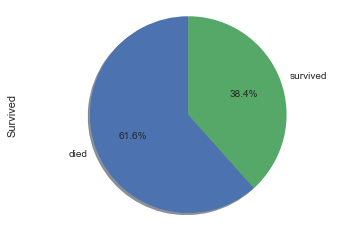

In [26]:
#Total survival analysis
labels = 'died', 'survived'
survivalpie = titanic.Survived.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True,
                                                         startangle=90)
survivalpie.axis('equal')
print "\nNumber of passengers survived:",len(titanic.loc[titanic['Survived']==1])
print "number of deaths",(891-342)

From the analysis we get that out of 891 passengers only 342 passengers survived.

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Class
first class     0.630
second class    0.473
third class     0.242
Name: Survived, dtype: float64

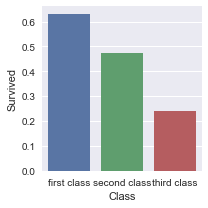

In [27]:
#survival based on class
print titanic.groupby('Pclass')['Survived'].sum()
print titanic.groupby('Pclass')['Survived'].mean()

sns.factorplot('Class','Survived', data=titanic,
               order=['first class','second class','third class'],
               kind='bar', size=3, ci=False)

# percentage of survivors by class
titanic.groupby('Class').Survived.mean().round(3)

We can see that Passenger class played a important role in survival of a passenger as 63% passengers survived from first class, 47% from second class and 24% from third class.
Third class being last it has low survival percentage.

Total number of males and females on board
no of males and number of females respectively 314 577

Survival count by gender

Sum based on gender Sex
female    233
male      109
Name: Survived, dtype: int64

survival rate by gender
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


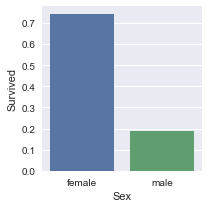

In [28]:
#Survival based on gender
print "Total number of males and females on board"
f=len(titanic.loc[titanic['Sex']=='female'])
m=891-f
print "no of males and number of females respectively",f,m
print "\nSurvival count by gender"
print "\nSum based on gender",titanic.groupby('Sex')['Survived'].sum()
print "\nsurvival rate by gender"

print titanic.groupby('Sex')['Survived'].mean()

sns.factorplot('Sex','Survived', data=titanic,
               order=['female','male'],
               kind='bar', size=3, ci=False)

We can clearly state that female were given priority to survive than male as 74% females survived and 18% males survived.


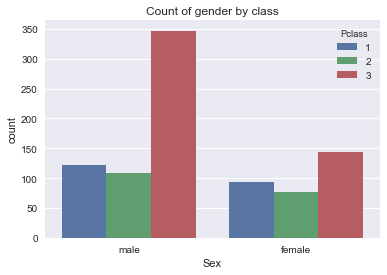

In [33]:
#survival graph of gender vs class
plt.figure()
sns.countplot(x='Sex',hue='Pclass',data=titanic)
plt.title('Count of gender by class')

Third class has most no of passengers.


# Conclusion

1.Out of 891 member only 342 of them survived.
2.Class played a important role in survival as passengers from First class survived mostly that is 63%.
3.Even gender played a important role as 74% females survived and 18% males only survived. This may not imply causation.
4.Age group of 20-30 has most number of survivors.

# Limitations

1. The data is incomplete with missing age, cabin and embark values.